# PROBLEM STATEMENT
#Predicting the sales of products across stores of a retail chain

In [35]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# READING AND ANALYZING THE PROBLEM STATEMENT

In [36]:
#Reading and analysing train data set.

In [37]:
df=pd.read_csv("train_data.csv",na_values=['!','#','$','&'])

In [38]:
df.head(5)#first five rows

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [39]:
df.tail(5)#last five rows 

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0


In [40]:
df.shape#shows the total number of rows and columns

(395000, 7)

In [41]:
df.dtypes#shows the different types of datatypes in the dataset

date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
sales                     int64
dtype: object

In [42]:
df.nunique()#shows the total numbers of unique attributes in the dataset

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
dtype: int64

In [43]:
#Reading and analysing product_prices.csv data set
#product_prices.csv file is named as df1

In [44]:
df1=pd.read_csv('product_prices.csv')

In [45]:
df1.head()#first five rows 

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


In [46]:
df1.shape#shows the total number of rows and columns in the dataset

(59000, 4)

In [47]:
df1.nunique()#shows the total numbers of unique attributes in the dataset

outlet                 10
product_identifier     50
week_id               118
sell_price            112
dtype: int64

In [48]:
df1.dtypes#shows the different types of datatypes in the dataset

outlet                  int64
product_identifier      int64
week_id                 int64
sell_price            float64
dtype: object

In [49]:
#Reading and analysing date_to_week_id_map.csv data set

In [50]:
df2=pd.read_csv('date_to_week_id_map.csv')

In [51]:
df2.head()

,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


In [52]:
df2.shape#shows the total number of rows and columns in the dataset

(821, 2)

In [53]:
df2.dtypes#shows the different types of datatypes in the dataset

date       object
week_id     int64
dtype: object

In [54]:
df2.nunique()#shows the total numbers of unique attributes in the dataset

date       821
week_id    118
dtype: int64

In [55]:
#merging df1 and df2 on basis of week_id

In [56]:
df3=pd.merge(df1, df2, on = "week_id", how = "inner")
df3

,outlet,product_identifier,week_id,sell_price,date
0,111,74,49,2.94,2012-01-01
1,111,74,49,2.94,2012-01-02
2,111,74,49,2.94,2012-01-03
3,111,74,49,2.94,2012-01-04
4,111,74,49,2.94,2012-01-05
...,...,...,...,...,...
410495,333,3008,166,1.98,2014-03-30
410496,333,3008,166,1.98,2014-03-31
410497,333,3021,166,2.08,2014-03-29
410498,333,3021,166,2.08,2014-03-30


In [57]:
#Analysing the merged data frames

In [58]:
df3.shape#shows the different types of datatypes in the dataset

(410500, 5)

In [59]:
df3.nunique()

outlet                 10
product_identifier     50
week_id               118
sell_price            112
date                  821
dtype: int64

In [60]:
df3.dtypes#shows the different types of datatypes in the dataset


outlet                  int64
product_identifier      int64
week_id                 int64
sell_price            float64
date                   object
dtype: object

In [61]:
#Merging df3 with test data set on date,product_identifier and outlet.

In [62]:
dff=pd.merge(df, df3, on =['date','product_identifier','outlet'],how = "inner")#merged file is named as dff
dff

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88
...,...,...,...,...,...,...,...,...,...
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98


# DESCRIPTIVE STATISTICS

In [64]:
dff.columns #Displaying the features of dataset.

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales', 'week_id',
       'sell_price'],
      dtype='object')

In [65]:
dff.head() #Displayinf first 5 rows of dataset.

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88


In [66]:
dff.tail() #Displaying last 5 rows of dataset.

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0,161,2.08


In [67]:
dff.shape #Displaying number of rows and columns of dataset.

(395000, 9)

In [68]:
dff.nunique() #Displaying the number of unique values in each rows.


date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
dtype: int64

In [69]:
dff.isnull().sum() #Displaying the number of null values in each columns.


date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [ ]:
# we do not have any null values in the dataset

In [70]:
dff.isna().sum()  #Displaying the number of Na values in each columns.

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
week_id                  0
sell_price               0
dtype: int64

In [71]:
dff.info() #Displaying the information of each column of dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395000 entries, 0 to 394999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   395000 non-null  object 
 1   product_identifier     395000 non-null  int64  
 2   department_identifier  395000 non-null  int64  
 3   category_of_product    395000 non-null  object 
 4   outlet                 395000 non-null  int64  
 5   state                  395000 non-null  object 
 6   sales                  395000 non-null  int64  
 7   week_id                395000 non-null  int64  
 8   sell_price             395000 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 30.1+ MB


In [72]:
dff.duplicated().sum() #Displaying the number of duplicates in entire dataset.

0

In [73]:
dff.describe() #Displaying the different statistical measures of each column.

,product_identifier,department_identifier,outlet,sales,week_id,sell_price
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000


In [74]:
dff.dtypes #Displaying the datatype of every column of dataset.

date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
week_id                    int64
sell_price               float64
dtype: object

In [75]:
dff.nunique() #Displaying the number of unique values in each rows.

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
dtype: int64

In [76]:
#plotting Heat map

<AxesSubplot:>

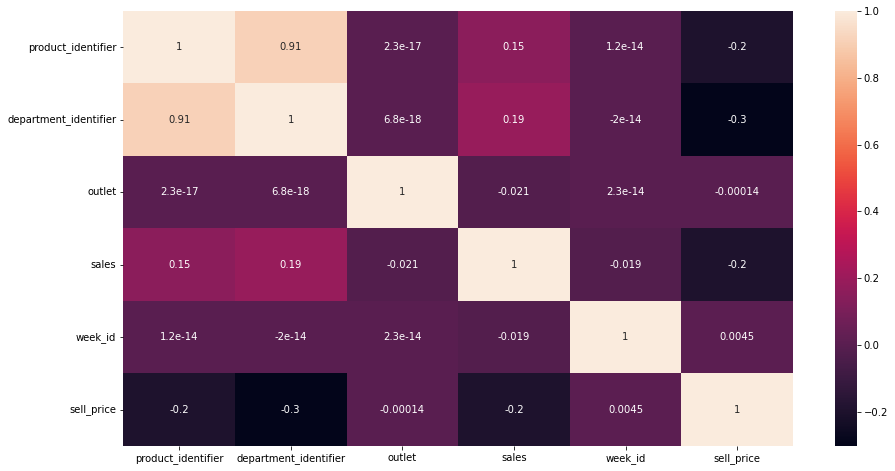

In [77]:
#heat map
plt.figure(figsize=(15,8))
sns.heatmap(dff.corr(),annot=True)  #Displaying the correlation matrix.

In [78]:
import datetime 

In [79]:
#Converting date as month,year,and day.
#we are spilting date to days,month and year

In [80]:
dff['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))
dff['month'] = df['date'].apply(lambda x: int(x.split('-')[1]))
dff['days'] = df['date'].apply(lambda x: int(x.split('-')[2]))  

In [81]:
dff=dff.drop('date',axis=1) #Dropping the date column since it is of object type.

In [82]:
dff.nunique()#unique values

product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
week_id                  113
sell_price               107
year                       3
month                     12
days                      31
dtype: int64

In [83]:
#Using Label Encoder to convert Categorical columns to numerical columns.

In [84]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dff['category_of_product']=labelencoder.fit_transform(dff['category_of_product'])
dff['state']=labelencoder.fit_transform(dff['state'])

In [85]:
dff.dtypes #checking weather all the columns are of int or float type.

product_identifier         int64
department_identifier      int64
category_of_product        int32
outlet                     int64
state                      int32
sales                      int64
week_id                    int64
sell_price               float64
year                       int64
month                      int64
days                       int64
dtype: object

<AxesSubplot:>

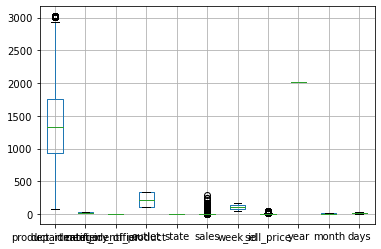

In [86]:
dff.boxplot() #Plotting box-plot to check for outliers.

# Exploratory data analysis

<AxesSubplot:ylabel='Count'>

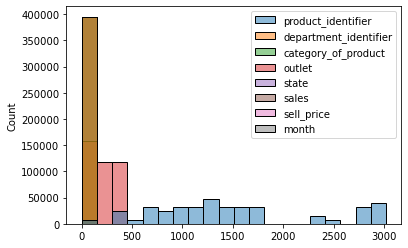

In [87]:
sns.histplot(dff[['product_identifier', 'department_identifier','category_of_product','outlet', 'state', 'sales','sell_price', 'month']],bins = 20)


<AxesSubplot:xlabel='sales', ylabel='Count'>

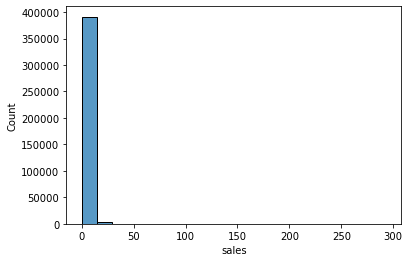

In [88]:
sns.histplot(df['sales'], bins = 20)

# Model building

In [89]:
#Applying train_test_split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x=dff.drop("sales",axis=1)

In [92]:
y=dff["sales"]

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [94]:
x_test.shape

(39500, 10)

In [95]:
x_train.shape

(355500, 10)

In [96]:
y_test.shape

(39500,)

In [97]:
y_train.shape

(355500,)

# Model no 1:RANDOM FOREST REGRESSOR

In [98]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [100]:
a_score=[]
for i in range (1,20):
    RF=RandomForestRegressor(n_estimators=i)
    RF.fit(x_train,y_train)
    y_pred=RF.predict(x_cv)
    a_score.append(RF.score(x_cv,y_cv))

In [101]:
a_score

[0.047184712351753255,
 0.26646293378081387,
 0.3243300123593199,
 0.33844655480668506,
 0.3594044169274291,
 0.3723375205961418,
 0.39466296226731357,
 0.39047372485620724,
 0.38165991361578766,
 0.38473598348000193,
 0.39216068432843143,
 0.4024622737878173,
 0.40920035939906885,
 0.40702340874312704,
 0.40716251919737456,
 0.39948404275758387,
 0.40034452859808,
 0.40357723290940684,
 0.4116089578539738]

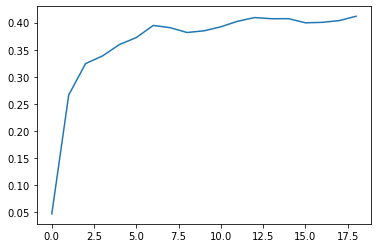

In [102]:
plt.plot(a_score)

In [103]:
max(a_score)

0.4116089578539738

In [104]:
np.argmax(a_score)

18

In [105]:
RF=RandomForestRegressor(n_estimators=18)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)


In [106]:
mean_squared_error(y_pred,y_test,squared=False)

2.578180424079982

In [107]:
RF.score(x_test,y_test)

0.510001941591851

In [108]:
RF.score(x_train,y_train)

0.919104446762694

# Model no 2: DECISION TREE REGRESSOR

In [109]:
x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [111]:
b_score=[]
for i in range (1,20):
    DR=DecisionTreeRegressor(max_depth=i)
    DR.fit(x_train,y_train)
    y_pred=DR.predict(x_cv)
    b_score.append(DR.score(x_cv,y_cv))

In [112]:
b_score

[0.14304705488904623,
 0.2028879302886405,
 0.2458617470383826,
 0.3295152098160472,
 0.3602051409436171,
 0.3783584456083222,
 0.3953305024988376,
 0.3978592488420566,
 0.38245704348294485,
 0.31202078418752066,
 0.29027496326112245,
 0.28015728092534975,
 0.23324183156450262,
 0.20447824238754397,
 0.18044696542292726,
 0.16013535110113108,
 0.14225031390214504,
 0.10820873739485493,
 0.1218119095695338]

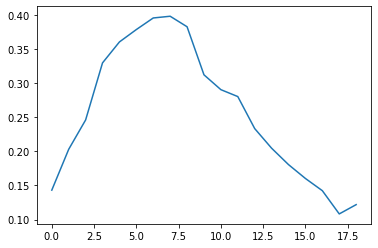

In [113]:
plt.plot(b_score)

In [114]:
max(b_score)

0.3978592488420566

In [115]:
np.argmax(b_score)

7

In [116]:
DR=DecisionTreeRegressor(max_depth=7)
DR.fit(x_train,y_train)
y_pred=DR.predict(x_test)
mean_squared_error(y_pred,y_test,squared=False)

2.85080072119733

In [117]:
DR.score(x_test,y_test)

0.40089703890650874

# LINEAR REGRESSION

In [118]:
from sklearn.linear_model import LinearRegression


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
scaler.fit(x_train)
print(scaler.mean_)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

[1.51035379e+03 2.44645345e+01 7.39535865e-01 2.11177581e+02
 1.00033474e+00 1.05072807e+02 4.98704667e+00 2.01261155e+03
 6.14155837e+00 1.57071280e+01]


In [122]:
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred=regr.predict(x_test)
print(regr.score(x_test, y_test))

0.06351442066922763


In [123]:
mean_squared_error(y_pred,y_test,squared=False)

3.5642378188304384

# saving the model

In [124]:
import joblib#Joblib is a set of tools to provide lightweight pipelining in Python

In [125]:
joblib.dump(DR,'DecisionTree.pkl')

['DecisionTree.pkl']

In [126]:
joblib.dump(RF,'Randomforest.pkl')

['Randomforest.pkl']

In [127]:
joblib.dump(regr,'Linear regression.pkl')

['Linear regression.pkl']

In [128]:
dt_model=joblib.load('DecisionTree.pkl')

In [129]:
rf_model=joblib.load('Randomforest.pkl')

In [130]:
lr_model=joblib.load('Linear regression.pkl')

# ANALYZING AND PREDICTING ON TEST DATA

In [131]:
#Reading and analysing test data set.

In [132]:
df_test=pd.read_csv('test_data.csv')

In [133]:
df_test.shape

(15500, 7)

In [134]:
df_test=pd.merge(df_test, df3, on =['date','product_identifier','outlet'],how = "inner")
df_test

,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88
...,...,...,...,...,...,...,...,...,...
15495,15496,2014-03-31,2932,33,drinks_and_food,333,Kerala,166,2.78
15496,15497,2014-03-31,2935,33,drinks_and_food,333,Kerala,166,0.20
15497,15498,2014-03-31,3004,33,drinks_and_food,333,Kerala,166,2.68
15498,15499,2014-03-31,3008,33,drinks_and_food,333,Kerala,166,1.98


In [135]:
import datetime

In [136]:
df_test['year'] = df_test['date'].apply(lambda x: int(x.split('-')[0]))
df_test['month'] = df_test['date'].apply(lambda x: int(x.split('-')[1]))
df_test['days'] = df_test['date'].apply(lambda x: int(x.split('-')[2]))

In [137]:
df_test.dtypes

id                         int64
date                      object
product_identifier         int64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
week_id                    int64
sell_price               float64
year                       int64
month                      int64
days                       int64
dtype: object

In [138]:
df_t=df_test.drop('id',axis=1)

In [139]:
import datetime

In [140]:
df_t['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))
df_t['month'] = df['date'].apply(lambda x: int(x.split('-')[1]))
df_t['days'] = df['date'].apply(lambda x: int(x.split('-')[2]))

In [141]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_t['category_of_product']=labelencoder.fit_transform(df_t['category_of_product'])
df_t['state']=labelencoder.fit_transform(df_t['state'])

In [142]:
df_t=df_t.drop('date',axis=1)

In [143]:
df_t.dtypes

product_identifier         int64
department_identifier      int64
category_of_product        int32
outlet                     int64
state                      int32
week_id                    int64
sell_price               float64
year                       int64
month                      int64
days                       int64
dtype: object

In [144]:
#Using different models on test data for prediction.

In [161]:
test_data_pred=dt_model.predict(df_t) #Using Decision tree model for predicting.

In [162]:
test_data_pred

array([0.35407725, 2.20614035, 0.33174792, ..., 3.33292156, 1.12900188,
       0.09414466])

In [164]:
randomforest_prediction=rf_model.predict(df_t) #Using Random tree model for predicting.

In [165]:
randomforest_prediction

array([0.33333333, 1.55555556, 0.77777778, ..., 0.        , 2.11111111,
       0.05555556])

In [166]:
linearregression_prediction=lr_model.predict(df_t) #Using linear regression model for predicting.

In [167]:
linearregression_prediction

array([-27326.29974888, -27076.44230509, -26995.82638581, ...,
       -24614.1735155 , -24609.9617988 , -24597.54963927])

In [151]:
#Merging the predicted sales.

In [170]:
Merged=df_test['id']
Merged.head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int64

In [171]:
Mergedf1.shape

(15500,)

In [172]:
Merging=pd.DataFrame(rf_pred)
Merging.head()

,0
0,0.333333
1,1.555556
2,0.777778
3,0.666667
4,1.944444


In [173]:
Merging.shape

(15500, 1)

In [183]:
prediction_data=pd.concat([Merged,Merging],axis=1)

In [184]:
prediction_data

,id,0
0,1,0.333333
1,2,1.555556
2,3,0.777778
3,4,0.666667
4,5,1.944444
...,...,...
15495,15496,1.111111
15496,15497,8.222222
15497,15498,0.000000
15498,15499,2.111111


In [185]:
prediction_data.rename(columns={prediction_data.columns[1]:'sales'},inplace=True)

In [159]:
#Converting the predicted output to csv file

In [186]:
prediction.to_csv('predicted_values.csv',index=False)

# DATA VISUALIZATION

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("train_data.csv",na_values=['!','#','$','&'])


In [10]:
df.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


In [11]:
df.columns

Index(['date', 'product_identifier', 'department_identifier',
       'category_of_product', 'outlet', 'state', 'sales'],
      dtype='object')

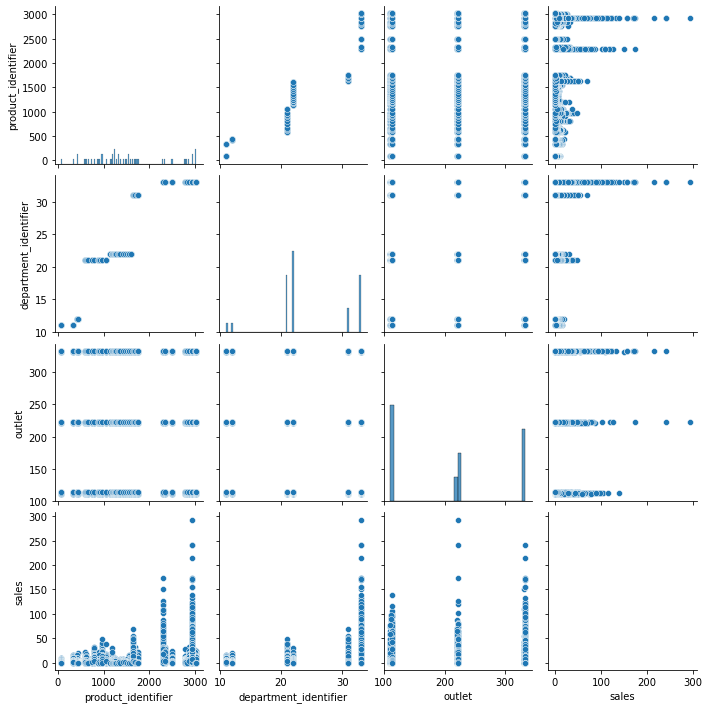

In [12]:
sns.pairplot(df)
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),)

<function matplotlib.pyplot.show(close=None, block=None)>

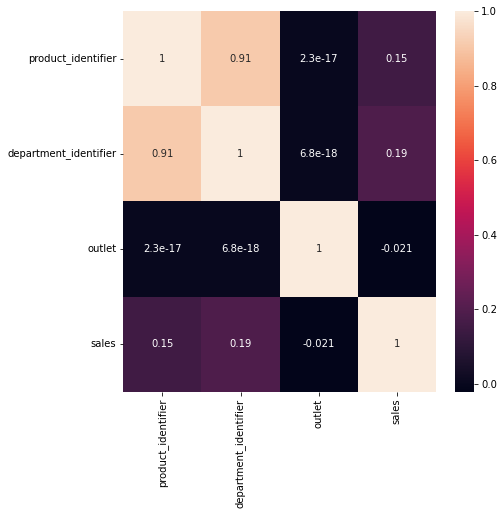

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.show

<AxesSubplot:xlabel='state', ylabel='sales'>

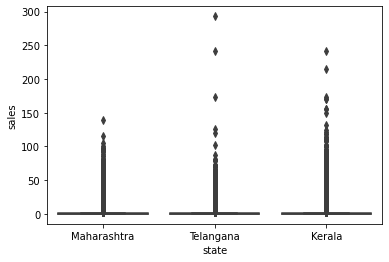

In [14]:
sns.boxplot(x ='state', y ='sales', data = df)


<AxesSubplot:xlabel='sales', ylabel='state'>

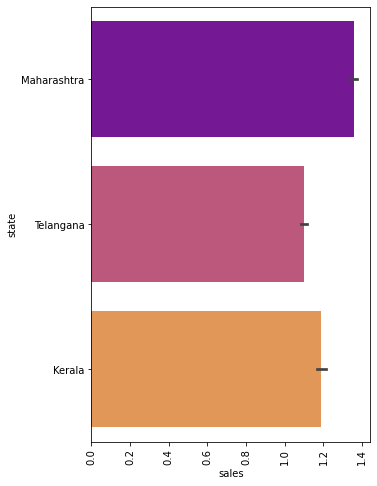

In [15]:
import matplotlib.pylab as plt 
plt.figure(figsize=(5,8))
plt.xticks(rotation=90)
sns.barplot(y='state', x ='sales', data = df, palette ='plasma')

In [25]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

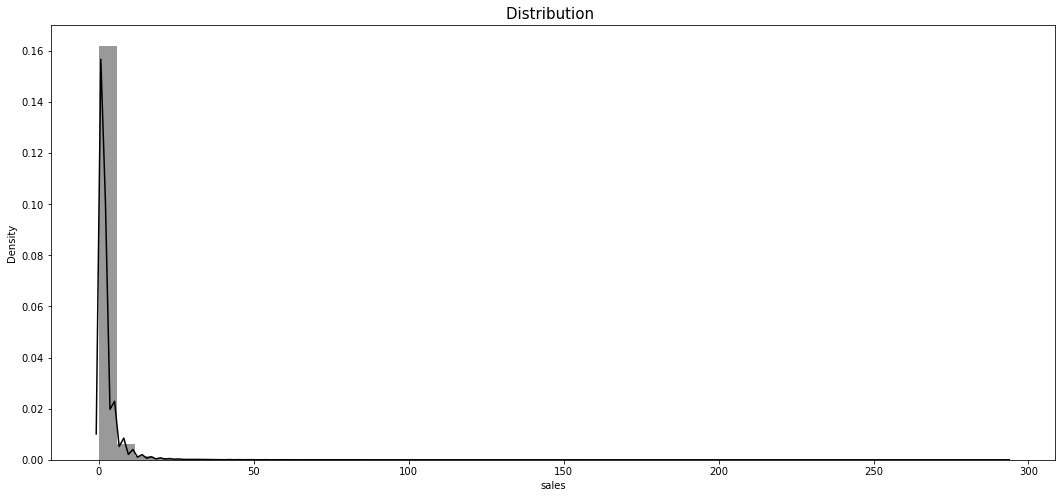

In [31]:
sns.distplot(df['sales'],color='black')
plt.title('Distribution ',fontsize=15)
plt.show()

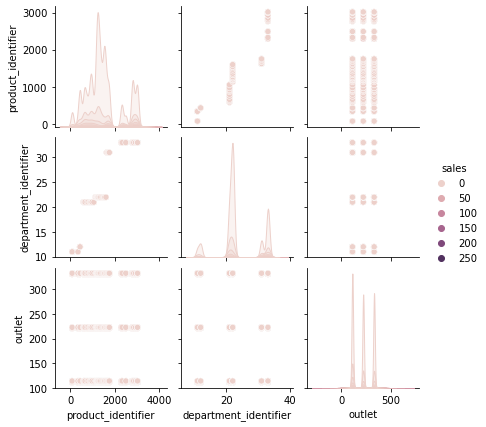

In [32]:
sns.pairplot(df, hue='sales', height=2)

<AxesSubplot:xlabel='sales', ylabel='Count'>

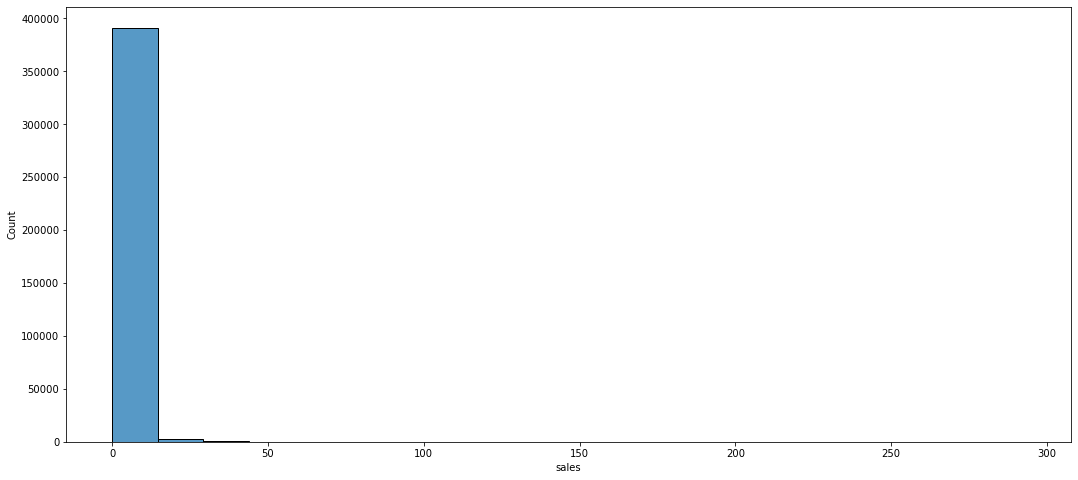

In [35]:
sns.histplot(df['sales'],bins=20)

<AxesSubplot:xlabel='state', ylabel='count'>

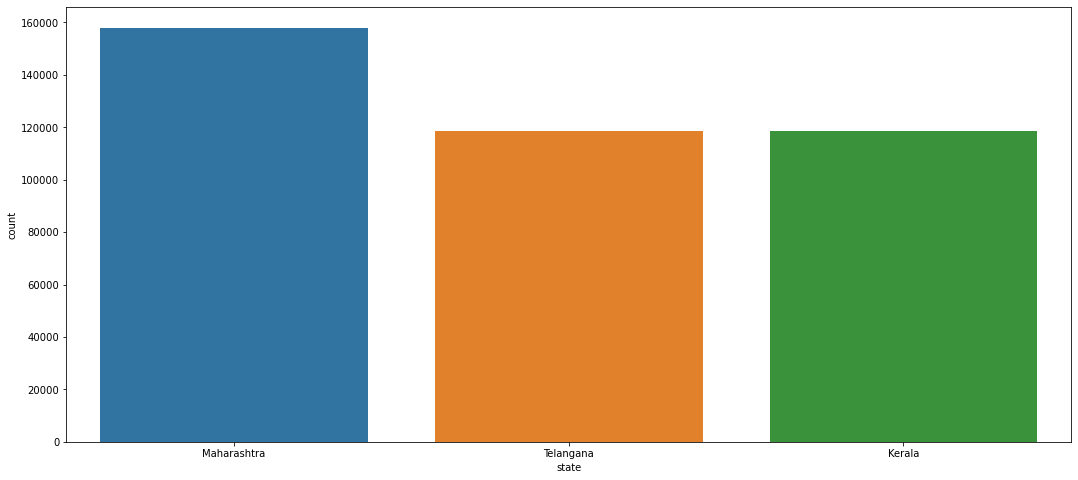

In [36]:
sns.countplot(df['state'])

<AxesSubplot:>

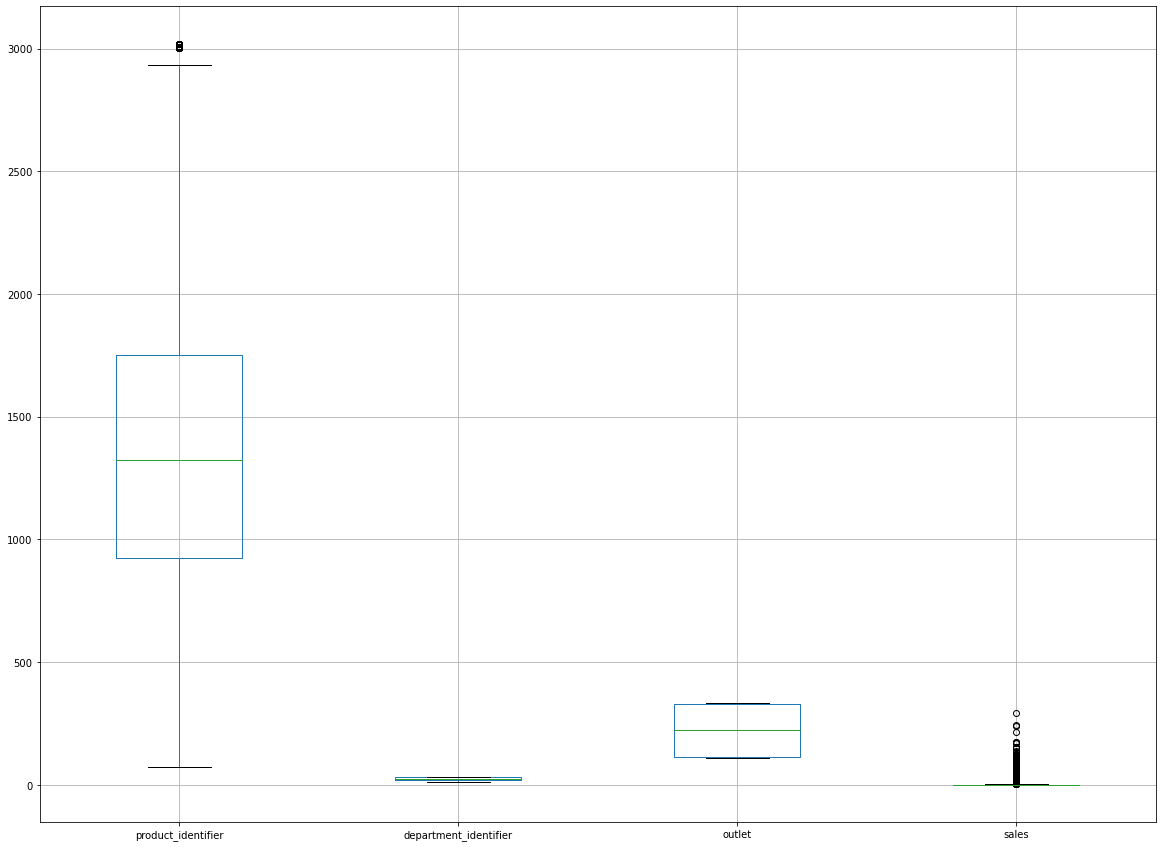

In [37]:
df.boxplot(figsize=(20,15))